In [3]:
import pandas as pd
file_path = r"C:\Users\supri\Downloads\diabetic_prediction_dataset_v2.csv"
df = pd.read_csv(file_path)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Diabetes_Status          1000 non-null   int64  
 1   Diet_Quality             1000 non-null   object 
 2   Physical_Activity_Level  1000 non-null   object 
 3   Smoking_Status           1000 non-null   object 
 4   Family_History           1000 non-null   object 
 5   Glucose_Level            1000 non-null   float64
 6   Insulin_Level            1000 non-null   float64
 7   BMI                      1000 non-null   float64
 8   Age                      1000 non-null   int64  
 9   HbA1c                    1000 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 78.3+ KB


,Diabetes_Status,Diet_Quality,Physical_Activity_Level,Smoking_Status,Family_History,Glucose_Level,Insulin_Level,BMI,Age,HbA1c
0,0,Good,Moderate,Current Smoker,Yes,81.512847,1.637218,29.918798,22,6.434641912216784
1,0,Good,High,Current Smoker,No,107.371667,12.784553,30.160025,57,Unknown
2,1,Good,High,Non-Smoker,Yes,141.782099,28.219859,25.802436,35,10.056928347439266
3,1,Poor,Low,Former Smoker,No,186.950405,20.350001,36.065222,38,Unknown
4,0,Good,High,Non-Smoker,Yes,77.492305,17.500545,20.303162,20,5.794398643021074


In [4]:
print("Missing Values:\n", df.isnull().sum())
print("\n'Unknown' value counts:\n", (df == "Unknown").sum())

Missing Values:
 Diabetes_Status            0
Diet_Quality               0
Physical_Activity_Level    0
Smoking_Status             0
Family_History             0
Glucose_Level              0
Insulin_Level              0
BMI                        0
Age                        0
HbA1c                      0
dtype: int64

'Unknown' value counts:
 Diabetes_Status              0
Diet_Quality                 0
Physical_Activity_Level      0
Smoking_Status               0
Family_History               0
Glucose_Level                0
Insulin_Level                0
BMI                          0
Age                          0
HbA1c                      200
dtype: int64


In [7]:
import numpy as np
df['HbA1c'] = df['HbA1c'].replace(["Unknown", "???", "N/A", "-", "None"], np.nan)
df['HbA1c'] = df['HbA1c'].astype(float)
df['HbA1c'] = df['HbA1c'].fillna(df['HbA1c'].median())
print(df['HbA1c'].isnull().sum())

0


In [8]:
df = pd.get_dummies(df, columns=['Diet_Quality', 'Physical_Activity_Level', 'Smoking_Status', 'Family_History'], drop_first=True)
df.head()

,Diabetes_Status,Glucose_Level,Insulin_Level,BMI,Age,HbA1c,Diet_Quality_Excellent,Diet_Quality_Good,Diet_Quality_Poor,Physical_Activity_Level_Low,Physical_Activity_Level_Moderate,Smoking_Status_Former Smoker,Smoking_Status_Non-Smoker,Family_History_Yes
0,0,81.512847,1.637218,29.918798,22,6.434642,False,True,False,False,True,False,False,True
1,0,107.371667,12.784553,30.160025,57,6.636961,False,True,False,False,False,False,False,False
2,1,141.782099,28.219859,25.802436,35,10.056928,False,True,False,False,False,False,True,True
3,1,186.950405,20.350001,36.065222,38,6.636961,False,False,True,True,False,True,False,False
4,0,77.492305,17.500545,20.303162,20,5.794399,False,True,False,False,False,False,True,True


In [9]:
df = df.astype(int)
df.head()

,Diabetes_Status,Glucose_Level,Insulin_Level,BMI,Age,HbA1c,Diet_Quality_Excellent,Diet_Quality_Good,Diet_Quality_Poor,Physical_Activity_Level_Low,Physical_Activity_Level_Moderate,Smoking_Status_Former Smoker,Smoking_Status_Non-Smoker,Family_History_Yes
0,0,81,1,29,22,6,0,1,0,0,1,0,0,1
1,0,107,12,30,57,6,0,1,0,0,0,0,0,0
2,1,141,28,25,35,10,0,1,0,0,0,0,1,1
3,1,186,20,36,38,6,0,0,1,1,0,1,0,0
4,0,77,17,20,20,5,0,1,0,0,0,0,1,1


In [10]:
from sklearn.preprocessing import StandardScaler
columns_to_scale = ['Glucose_Level', 'Insulin_Level', 'BMI', 'Age', 'HbA1c']
scaler = StandardScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
df.head()

,Diabetes_Status,Glucose_Level,Insulin_Level,BMI,Age,HbA1c,Diet_Quality_Excellent,Diet_Quality_Good,Diet_Quality_Poor,Physical_Activity_Level_Low,Physical_Activity_Level_Moderate,Smoking_Status_Former Smoker,Smoking_Status_Non-Smoker,Family_History_Yes
0,0,-1.231259,-1.443622,0.455287,-1.513587,-0.139057,0,1,0,0,1,0,0,1
1,0,-0.685441,-0.431781,0.626448,0.308820,-0.139057,0,1,0,0,0,0,0,0
2,1,0.028320,1.039990,-0.229355,-0.836693,2.217841,0,1,0,0,0,0,1,1
3,1,0.973003,0.304104,1.653412,-0.680487,-0.139057,0,0,1,1,0,1,0,0
4,0,-1.315230,0.028148,-1.085158,-1.617725,-0.728282,0,1,0,0,0,0,1,1


In [11]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Diabetes_Status']) 
y = df['Diabetes_Status'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)

Training data shape: (800, 13) (800,)
Testing data shape: (200, 13) (200,)


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

Model Accuracy: 0.97
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       102
           1       0.98      0.97      0.97        98

    accuracy                           0.97       200
   macro avg       0.98      0.97      0.97       200
weighted avg       0.98      0.97      0.97       200



In [13]:
from sklearn.model_selection import GridSearchCV
log_reg = LogisticRegression()
param_grid = {'C': [0.01, 0.1, 1, 10, 100]} 
grid_search = GridSearchCV(log_reg, param_grid, scoring='f1', cv=5) 
grid_search.fit(X_train, y_train)
print("Best Hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

Best Hyperparameters: {'C': 100}


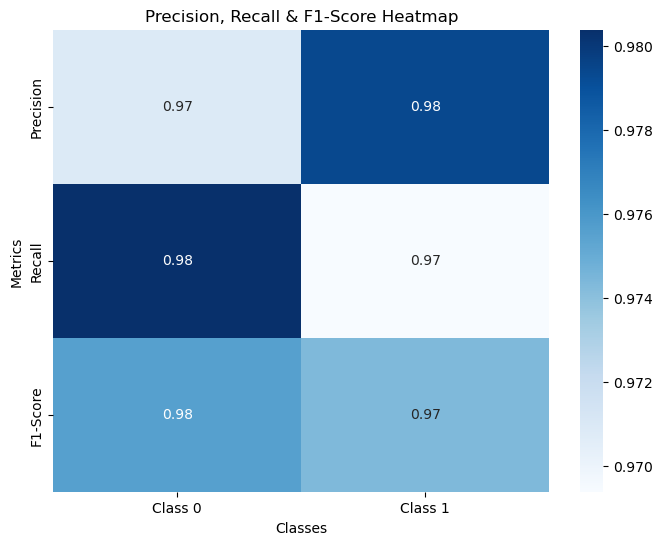

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average=None)
labels = ['Class 0', 'Class 1']
metrics = ['Precision', 'Recall', 'F1-Score']
values = [precision, recall, f1]
plt.figure(figsize=(8, 6))
sns.heatmap(values, annot=True, fmt=".2f", cmap="Blues", xticklabels=labels, yticklabels=metrics)
plt.xlabel("Classes")
plt.ylabel("Metrics")
plt.title("Precision, Recall & F1-Score Heatmap")
plt.show()

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  
    'penalty': ['l1', 'l2'],  
    'solver': ['liblinear'] 
}
param_labels = {
    'C': "Inverse of regularization strength (higher = less regularization)",
    'penalty': "Type of Regularization (L1 = Lasso, L2 = Ridge)",
    'solver': "Solver used for optimization"
}
for param, description in param_labels.items():
    print(f"{param}: {description}")
log_reg = LogisticRegression()
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='f1', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("\nBest Hyperparameters:", best_params)

C: Inverse of regularization strength (higher = less regularization)
penalty: Type of Regularization (L1 = Lasso, L2 = Ridge)
solver: Solver used for optimization
Fitting 5 folds for each of 10 candidates, totalling 50 fits

Best Hyperparameters: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}


In [16]:
best_log_reg = LogisticRegression(**grid_search.best_params_)
best_log_reg.fit(X_train, y_train)
y_pred = best_log_reg.predict(X_test)


Model Evaluation:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       102
           1       0.98      0.97      0.97        98

    accuracy                           0.97       200
   macro avg       0.98      0.97      0.97       200
weighted avg       0.98      0.97      0.97       200



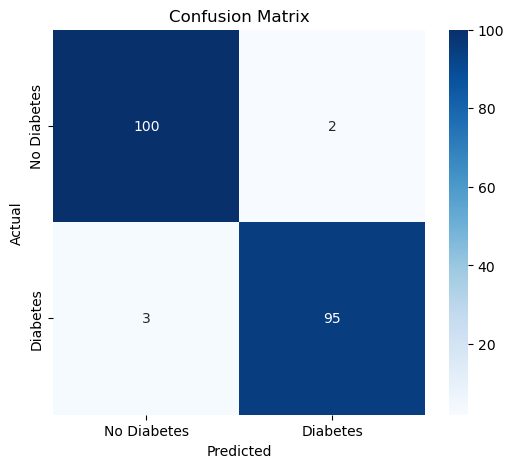

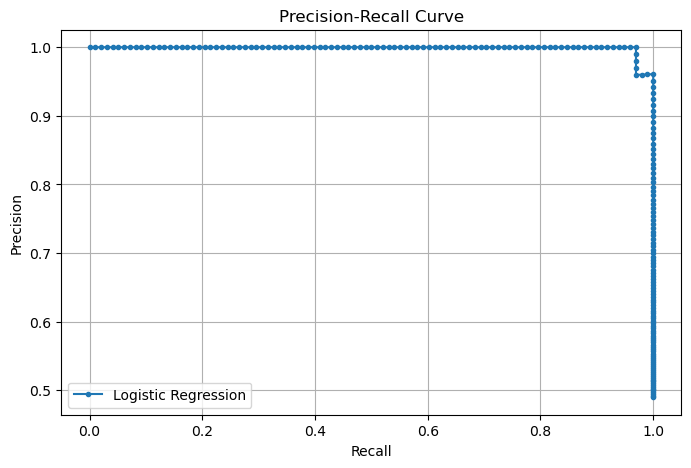

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
print("\nModel Evaluation:")
print(classification_report(y_test, y_pred))
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
precision, recall, _ = precision_recall_curve(y_test, best_log_reg.decision_function(X_test))
plt.figure(figsize=(8, 5))
plt.plot(recall, precision, marker='.', label='Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       102
           1       0.98      0.97      0.97        98

    accuracy                           0.97       200
   macro avg       0.98      0.97      0.97       200
weighted avg       0.98      0.97      0.97       200



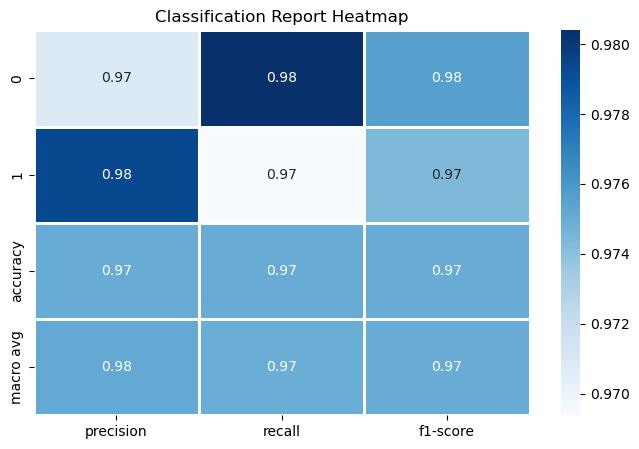

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
import pandas as pd
report_dict = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
plt.figure(figsize=(8, 5))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="Blues", fmt=".2f", linewidths=1)
plt.title("Classification Report Heatmap")
plt.show()

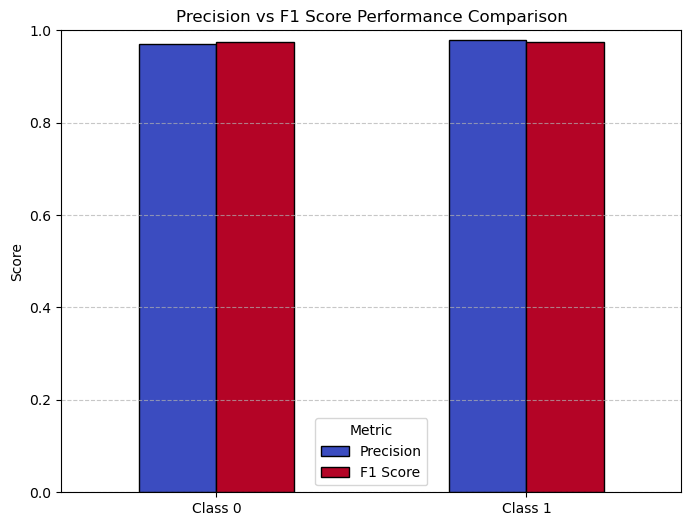

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report
import pandas as pd
report_dict = classification_report(y_test, y_pred, output_dict=True)

metrics_df = pd.DataFrame({
    "Precision": report_dict["0"]["precision"], 
    "F1 Score": report_dict["0"]["f1-score"]
}, index=["Class 0"])

metrics_df.loc["Class 1"] = [report_dict["1"]["precision"], report_dict["1"]["f1-score"]]

metrics_df.plot(kind="bar", figsize=(8, 6), colormap="coolwarm", edgecolor="black")
plt.title("Precision vs F1 Score Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1) 
plt.xticks(rotation=0)  
plt.legend(title="Metric")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

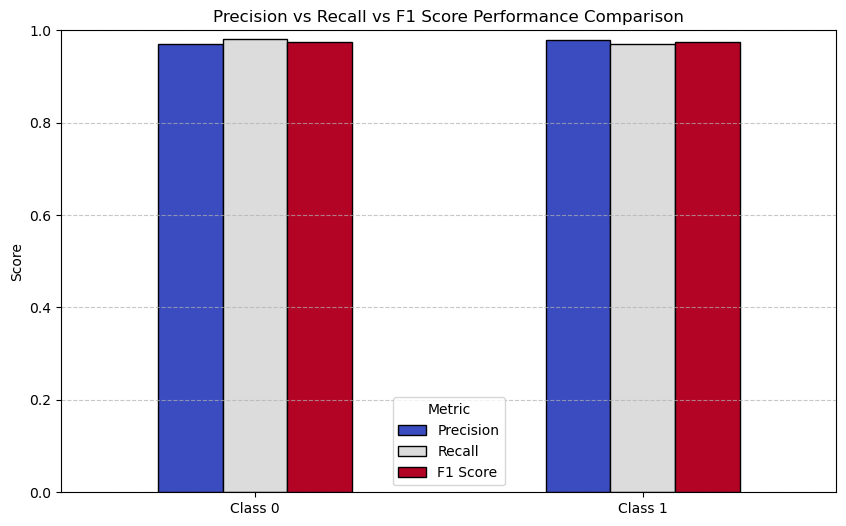

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report

report_dict = classification_report(y_test, y_pred, output_dict=True)

metrics_df = pd.DataFrame({
    "Precision": [report_dict["0"]["precision"], report_dict["1"]["precision"]],
    "Recall": [report_dict["0"]["recall"], report_dict["1"]["recall"]],
    "F1 Score": [report_dict["0"]["f1-score"], report_dict["1"]["f1-score"]]
}, index=["Class 0", "Class 1"])

metrics_df.plot(kind="bar", figsize=(10, 6), colormap="coolwarm", edgecolor="black")
plt.title("Precision vs Recall vs F1 Score Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1) 
plt.xticks(rotation=0)  
plt.legend(title="Metric")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()